
Deep Learning: Assignment 2

    Plot simple Sigmoid Neuron Function using matplotlib or seaborn python libraries
    Plot a 2-D Contour plot for dummny values of X and Y
    Plot a 3-D Contour plot for dummny values of X and Y
    Train SigmoidNeuron Model on the dummy TOY dataset and do contour plotting
    Run the SigmoidNeuron Model on any dataset of your choice.


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Sigmoid Neuron

1-D Sigmoid Neuron

In [2]:
#function for simple sigmoid neuron
def sigmoid(x, w, b):
    return 1/(1 + np.exp(-(w*x + b)))

In [3]:
#input data
values = np.arange(-10, 10, 0.1)
w = 1.0
b = 1.0

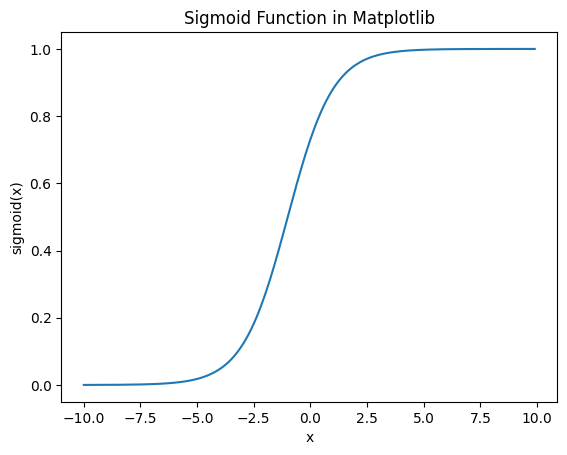

In [4]:
#plot for 1-D sigmoid neuron
plt.plot(values, sigmoid(values,w,b))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function in Matplotlib')
plt.show()

2-D Sigmoid Neuron

In [5]:
#function for sigmoid neuron considering two parameters
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [6]:
#input data
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

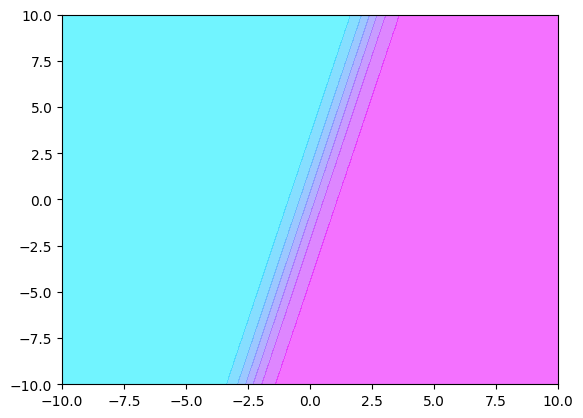

In [7]:
#calculate results for 2-D sigmoid neuron
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

#plot 2-D sigmoid neuron
plt.contourf(XX1, XX2, Y, cmap = 'cool', alpha = 0.6)
plt.show()

3-D Sigmoid Neuron

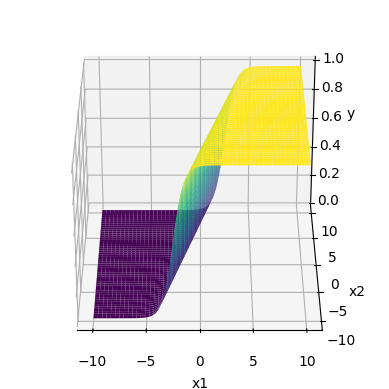

In [8]:
#plot for 3-D sigmoid neuron
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Loss Function

In [9]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

In [10]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [11]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [12]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

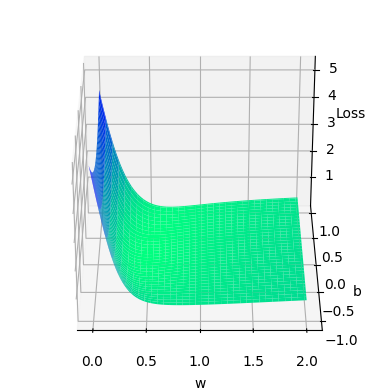

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='winter_r')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)


# Sigmoid Neuron

Sigmoid Neuron Class

In [14]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=False):
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        if display_loss:
            loss = {}
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            #print(self.w)
            #print(self.b)
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * y

Fit Sigmoid Neuron Class and Obtain Results

In [15]:
#dummy data for sigmoid neuron class
X = np.asarray([[-5, 0],[0, 7],[-5, 5], [-2, 2], [-3, -3], [4, 5], [5, -5], [6, 0],[3, 0],[1, -7]])
Y = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [16]:
#function to plot the results
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap='magma', alpha=0.6)
    ax.scatter(X[:,0], X[:,1],c=Y, cmap='autumn_r')
    ax.plot()

100%|██████████| 1/1 [00:00<00:00, 217.23epoch/s]


[[1.49172456 1.61883557]] [0.01322868]


100%|██████████| 1/1 [00:00<00:00, 1149.12epoch/s]


[[0.9750777  2.11706616]] [0.10549069]


100%|██████████| 1/1 [00:00<00:00, 1617.55epoch/s]


[[0.87715301 2.12342483]] [0.11291175]


100%|██████████| 1/1 [00:00<00:00, 1091.70epoch/s]


[[0.74539958 2.12764243]] [0.12187272]


100%|██████████| 1/1 [00:00<00:00, 1219.63epoch/s]


[[0.54211013 2.12998274]] [0.13583815]


100%|██████████| 1/1 [00:00<00:00, 1305.42epoch/s]


[[0.13578084 2.13060485]] [0.16718278]


100%|██████████| 1/1 [00:00<00:00, 358.30epoch/s]


[[-0.88654135  2.12884126]] [0.24120632]


100%|██████████| 1/1 [00:00<00:00, 696.27epoch/s]


[[-0.93935129  2.08525186]] [0.25524122]


100%|██████████| 1/1 [00:00<00:00, 1311.54epoch/s]


[[-1.00371695  2.02772102]] [0.27362799]


100%|██████████| 1/1 [00:00<00:00, 1533.57epoch/s]


[[-1.0888478   1.94706711]] [0.29914632]


100%|██████████| 1/1 [00:00<00:00, 1098.56epoch/s]


[[-1.21399328  1.82368764]] [0.33746209]


100%|██████████| 1/1 [00:00<00:00, 1348.22epoch/s]


[[-1.41893092  1.61570206]] [0.3986647]


100%|██████████| 1/1 [00:00<00:00, 1029.53epoch/s]


[[-1.72485813  1.28496877]] [0.46651192]


100%|██████████| 1/1 [00:00<00:00, 714.65epoch/s]


[[-2.00043567  0.94726818]] [0.47533642]


100%|██████████| 1/1 [00:00<00:00, 208.83epoch/s]


[[-2.007737    0.93842165]] [0.47566021]


100%|██████████| 1/1 [00:00<00:00, 158.38epoch/s]


[[-2.01415981  0.93065076]] [0.4759552]


100%|██████████| 1/1 [00:00<00:00, 446.25epoch/s]


[[-2.0198959   0.92372016]] [0.47622699]


100%|██████████| 1/1 [00:00<00:00, 132.33epoch/s]


[[-2.02507998  0.91746463]] [0.4764796]


100%|██████████| 1/1 [00:00<00:00, 646.27epoch/s]


[[-2.02981041  0.91176359]] [0.47671605]


100%|██████████| 1/1 [00:00<00:00, 609.28epoch/s]


[[-2.03416123  0.90652628]] [0.47693867]


100%|██████████| 1/1 [00:00<00:00, 1086.33epoch/s]


[[-2.03818966  0.90168267]] [0.47714929]


100%|██████████| 1/1 [00:00<00:00, 151.14epoch/s]


[[-2.04194079  0.89717753]] [0.47734939]


100%|██████████| 1/1 [00:00<00:00, 654.64epoch/s]


[[-2.04545085  0.89296654]] [0.47754017]


100%|██████████| 1/1 [00:00<00:00, 710.42epoch/s]


[[-2.04874934  0.88901359]] [0.47772263]


100%|██████████| 1/1 [00:00<00:00, 737.27epoch/s]


[[-2.05186067  0.88528886]] [0.47789761]


100%|██████████| 1/1 [00:00<00:00, 386.43epoch/s]


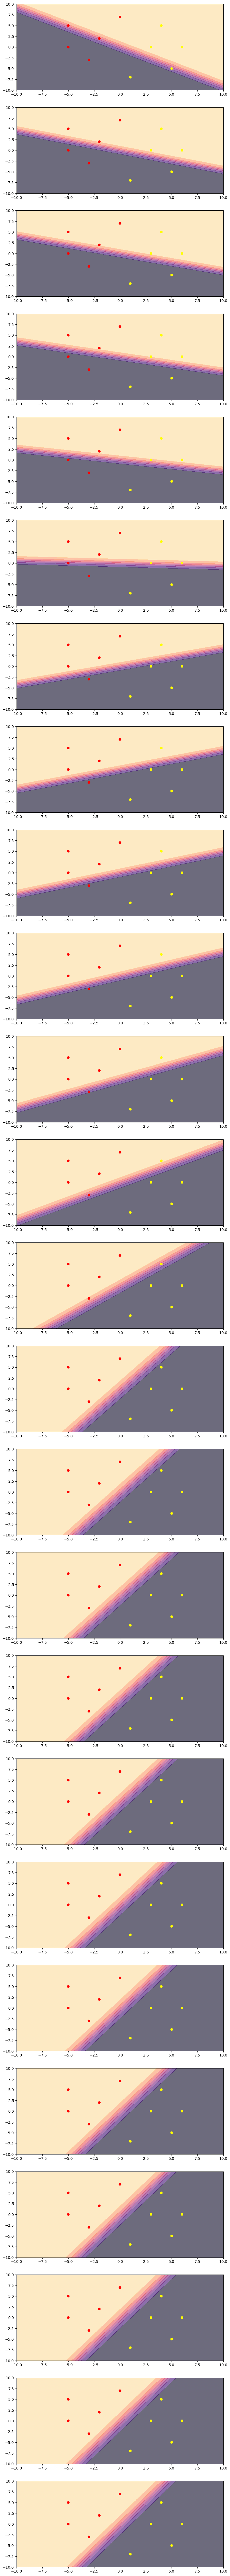

In [19]:
#create model object
sigmoid_neuron = SigmoidNeuron()

#fit the model and view results
sigmoid_neuron.fit(X, Y, 1, 0.05, True)
N = 25
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sigmoid_neuron.w, sigmoid_neuron.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sigmoid_neuron, ax)
    sigmoid_neuron.fit(X, Y, 1, 0.5, False)

# Fit Sigmoid Neuron Class for Actual Data and View Results

In [20]:
#import dataset
df = pd.read_csv('heart.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='target', ylabel='count'>

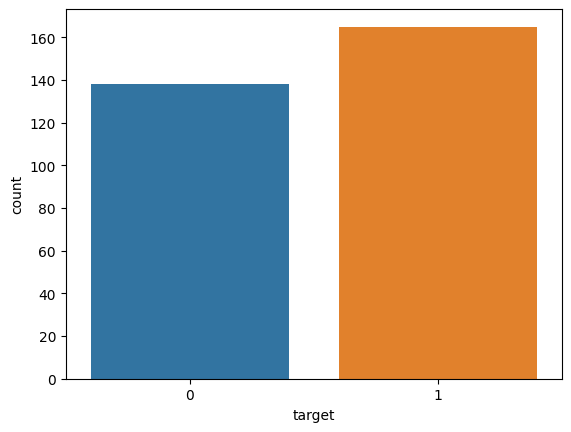

In [24]:
sns.countplot(data=df, x='target')

**Split Dataset for Train and Test and Normalize Data**

In [27]:
x = df[["age","sex","cp","trestbps"]]
y = df["target"]
print("x shape is",x.shape)
print("y shape is",y.shape)

x shape is (303, 4)
y shape is (303,)


In [28]:
#Splitting the dataset into test data and train data
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.7, random_state=5)

In [29]:
print("x_train shape is",x_train.shape)
print("x_test shape is",x_test.shape)
print("y_train shape is",y_train.shape)
print("y_train shape is",y_test.shape)

x_train shape is (212, 4)
x_test shape is (91, 4)
y_train shape is (212,)
y_train shape is (91,)


In [30]:
display(x_train.dtypes)

age         int64
sex         int64
cp          int64
trestbps    int64
dtype: object

In [31]:
display(y_train.dtypes)

dtype('int64')

**Sigmoid Neuron Class**

In [32]:
class SigmoidNeuron__:
    def __init__(self, learning_rate=0.01, epochs = 1000):
        self.b = None   #bias
        self.W = None
        self.lr = learning_rate
        self.iters = epochs
        self.errorPerItr = None

    def sigmoid_func(self,power):
        return 1.0/(1.0 + np.exp(-power))

    def predict(self, X):
        y_pred = []
        for index in range(len(X)):
            x=X.iloc[index]
            linear_output = np.dot(x, self.W.T) + self.b  #we got the exponent
            y_predicted = self.sigmoid_func(linear_output)
            y_pred.append(y_predicted)
        return y_pred


    #sigmoid neuron needs a principled learning algorithm for learning the values of W and B
    def fit(self, X, Y):
        self.b = 0
        n_features = X.shape[1]
        self.W = np.zeros(n_features)

        #ensure that y is 0 or 1
        y_ = np.array([1 if i>0 else 0 for i in Y])

        self.errorPerItr = []

        for itr in range(self.iters):
            grad_w = 0
            grad_b = 0
            loss = 0
            for index in range(len(X)):
                x=X.iloc[index]
                linear_output = np.dot(x, self.W) + self.b
                y_predicted = self.sigmoid_func(linear_output)
                fx = y_predicted

                y= Y.iloc[index]
                grad_w += (fx - y)*fx*(1-fx)*np.dot(np.ones(n_features), x)
                grad_b += (fx - y)*fx*(1-fx)

                #for each epoch we will calculate the loss
                loss += (fx - y)**2
            self.errorPerItr.append(0.5 * loss)
            #print("L: ", 0.5 * loss)

            #calculate new W and b
            for i in range(n_features): # since W is a vector
                self.W[i] -= self.lr*grad_w
            self.b -= self.lr*grad_b    # b is a scalar
            #print("w: ", self.W)
            #print("B: ", self.b)


**Fit Data and Predict Values**

In [33]:
sn_Model = SigmoidNeuron__(learning_rate = 0.01, epochs=20)
sn_Model.fit(x_train,y_train)

In [34]:
prediction = sn_Model.predict(x_test)

### View Results

In [36]:
print("Accuracy : ", accuracy_score(y_test, prediction))

Accuracy :  0.5274725274725275
